<a href="https://colab.research.google.com/github/Keerthana123-coder/AirQualityLevelPrediction/blob/master/Air_quality_level_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING PACKAGES

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from collections import Counter as count
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [4]:
df=pd.read_csv(r'/content/Dataset.csv')

PREPROCESSING STEPS

In [5]:
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [6]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [7]:
df.tail()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good
4999,24.1,77.9,81.7,94.3,23.2,10.5,1.38,8.3,461,Moderate


In [8]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [10]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


In [11]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as count
le= LabelEncoder()
print("before LabelEncoding:",count(df['Air Quality']))
df['Air Quality']=le.fit_transform(df['Air Quality'])
print("after LabelEncoding ",count(df['Air Quality']))

before LabelEncoding: Counter({'Good': 2000, 'Moderate': 1500, 'Poor': 1000, 'Hazardous': 500})
after LabelEncoding  Counter({0: 2000, 2: 1500, 3: 1000, 1: 500})


In [13]:
df['Air Quality'].value_counts()

,count
Air Quality,
0,2000
2,1500
3,1000
1,500


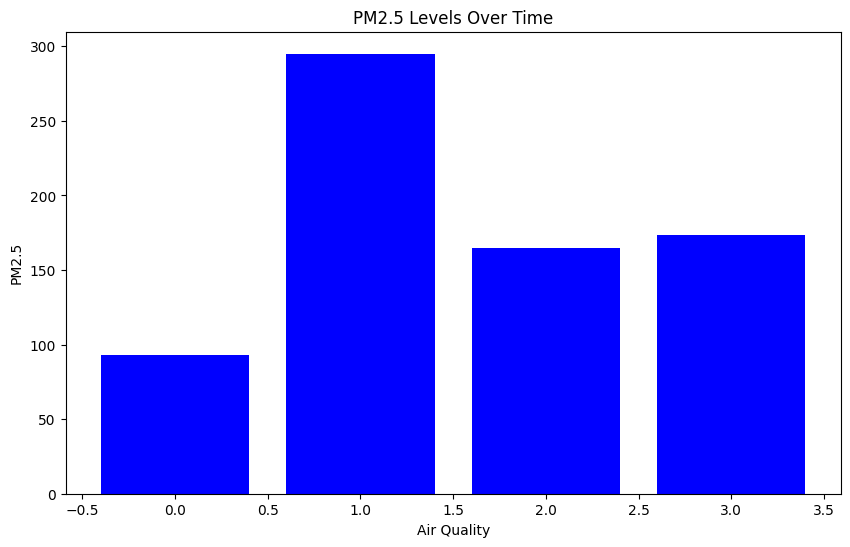

In [14]:
plt.figure(figsize=(10,6))
plt.bar(df['Air Quality'],df['PM2.5'], color='blue')
plt.title('PM2.5 Levels Over Time')
plt.xlabel('Air Quality')

plt.ylabel('PM2.5')
plt.show()

In [15]:
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,1
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,2
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,2
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,0


In [16]:
x=df.drop(['Air Quality'],axis=1)
y=df['Air Quality']
print(x.head(),'\n')
print(y.head())

   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density  
0                            6.3                 319  
1                            6.0                 611  
2                            5.2                 619  
3                           11.1                 551  
4                           12.7                 303   

0    2
1    2
2    2
3    0
4    0
Name: Air Quality, dtype: int64


In [17]:

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=2)
print(train_x.head())
print(train_y.head())

      Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
868          28.6      66.0    0.8   4.2  19.4   7.1  1.11   
936          37.5      49.5    9.5  14.9  21.7   7.3  1.64   
4034         29.2      70.2    9.6  14.3  21.9   3.8  1.03   
1923         24.8      76.1    0.8   9.4  15.0   1.9  0.86   
3330         34.9      65.4   16.7  27.2  18.4  12.1  1.67   

      Proximity_to_Industrial_Areas  Population_Density  
868                            12.7                 490  
936                             5.4                 654  
4034                           11.1                 262  
1923                           10.8                 458  
3330                            9.8                 351  
868     0
936     2
4034    0
1923    0
3330    2
Name: Air Quality, dtype: int64


LINEAR REGRESSION MODEL

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
model_lr=LinearRegression()
model_lr.fit(train_x,train_y)

LinearRegression()

In [19]:
train_lr=model_lr.predict(train_x)
test_lr=model_lr.predict(test_x)


train_mse_lr=mean_squared_error(train_y,train_lr)
test_mse_lr=mean_squared_error(test_y,test_lr)

train_r2_lr=r2_score(train_y,train_lr)
test_r2_lr=r2_score(test_y,test_lr)

print(train_mse_lr,'\n')
print(test_mse_lr,'\n')
print(train_r2_lr,'\n')
print(test_r2_lr)

0.6391865397002275 

0.6646107159377227 

0.5509906632873337 

0.5065168896528947


In [20]:
model_lg=LogisticRegression()
model_lg.fit(train_x,train_y)
lg_pred_train=model_lg.predict(train_x)
lg_pred_test=model_lg.predict(test_x)
print("logistic regression training ",lg_pred_train)
print("logistic regression testing ",lg_pred_test)

logistic regression training  [0 2 0 ... 1 0 2]
logistic regression testing  [2 1 3 0 3 2 2 0 1 1 2 3 0 2 2 0 2 2 0 0 2 0 3 2 0 0 0 2 0 3 0 2 0 1 2 2 1
 0 2 0 0 2 0 3 3 3 2 0 0 3 0 0 0 3 2 0 3 3 0 3 0 0 2 0 3 0 1 1 2 3 1 3 0 1
 2 0 2 3 1 0 3 0 0 3 2 0 2 0 0 0 0 2 0 0 2 1 0 2 0 0 2 0 0 2 2 0 3 0 3 0 0
 0 3 0 2 0 3 2 0 0 1 3 0 2 2 0 1 2 3 3 2 2 0 2 2 0 3 0 2 2 0 3 1 2 0 2 0 2
 0 0 3 0 0 0 3 2 0 2 0 3 2 0 1 1 0 2 1 2 3 0 2 0 2 0 0 0 0 2 1 2 2 0 0 0 2
 3 1 0 3 3 2 1 2 0 0 0 2 2 3 2 2 2 0 3 0 0 2 0 1 2 3 0 0 2 2 1 0 2 0 0 2 2
 0 2 3 2 0 1 0 0 3 3 0 3 2 0 2 0 0 3 0 0 3 0 3 0 2 0 0 1 0 0 3 0 0 2 0 0 3
 2 2 3 2 2 2 0 3 2 3 0 0 3 0 0 2 3 0 2 2 2 2 1 0 3 3 1 0 0 0 2 0 1 0 2 2 0
 1 3 0 3 0 3 3 2 3 3 3 0 2 3 2 0 2 2 2 3 2 2 3 3 2 0 3 2 2 3 0 2 0 0 0 3 2
 2 0 0 0 3 1 0 3 2 0 0 2 0 3 2 2 2 0 0 2 2 2 0 2 0 2 0 0 0 0 0 0 2 0 0 3 2
 2 0 3 0 0 0 0 2 2 1 0 0 3 0 0 2 2 0 1 0 0 3 2 3 2 2 2 2 0 1 3 2 3 2 1 3 0
 0 0 0 0 0 3 3 0 0 0 0 2 2 2 3 1 0 3 2 2 0 2 0 2 0 3 3 0 0 0 0 2 0 0 2 0 0
 1 0 3 2 0 2 3 2 0 2 0 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **PERFORMANCE** **METRICS**

In [21]:
accuracy_train=accuracy_score(train_y,lg_pred_train)
accuracy_test=accuracy_score(test_y,lg_pred_test)
print("training accuracy score:",accuracy_train,'\n')
print("testing accuracy score:",accuracy_test)

training accuracy score: 0.75125 

testing accuracy score: 0.775


In [22]:
confusion_matrix(test_y,lg_pred_test)
tn=confusion_matrix(test_y,lg_pred_test).ravel()
fp=confusion_matrix(test_y,lg_pred_test).ravel()
fn=confusion_matrix(test_y,lg_pred_test).ravel()
tp=confusion_matrix(test_y,lg_pred_test).ravel()
print("true negative:",tn,'\n')
print("false positive:",fp,'\n')
print("false negative:",fn,'\n')
print("true positive:",tp)


true negative: [418   0   5   0   0  36   8  61  19  14 240  33   2  28  55  81] 

false positive: [418   0   5   0   0  36   8  61  19  14 240  33   2  28  55  81] 

false negative: [418   0   5   0   0  36   8  61  19  14 240  33   2  28  55  81] 

true positive: [418   0   5   0   0  36   8  61  19  14 240  33   2  28  55  81]


In [23]:
confusion_matrix(test_y,lg_pred_test)
tn=confusion_matrix(train_y,lg_pred_train).ravel()
fp=confusion_matrix(train_y,lg_pred_train).ravel()
fn=confusion_matrix(train_y,lg_pred_train).ravel()
tp=confusion_matrix(train_y,lg_pred_train).ravel()
print("true negative:",tn,'\n')
print("false positive:",fp,'\n')
print("false negative:",fn,'\n')
print("true positive:",tp)


true negative: [1553    0   24    0    0  129   58  208   55   52  929  158    2  148
  290  394] 

false positive: [1553    0   24    0    0  129   58  208   55   52  929  158    2  148
  290  394] 

false negative: [1553    0   24    0    0  129   58  208   55   52  929  158    2  148
  290  394] 

true positive: [1553    0   24    0    0  129   58  208   55   52  929  158    2  148
  290  394]


In [24]:
confusion_matrix(train_y,lg_pred_train)

array([[1553,    0,   24,    0],
       [   0,  129,   58,  208],
       [  55,   52,  929,  158],
       [   2,  148,  290,  394]])

In [25]:
recall=tp/(tp+fn)
precision=tp/(tp+fp)
f1_score=(2*(precision*recall))/(precision+recall)
print("recall of logistic regression:",recall)
print("precision of logistic regression:",precision)
print(" f1_score of logistic regression:",f1_score)

recall of logistic regression: [0.5 nan 0.5 nan nan 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
precision of logistic regression: [0.5 nan 0.5 nan nan 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 f1_score of logistic regression: [0.5 nan 0.5 nan nan 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


<ipython-input-25-3f4bd62b2171>:1: RuntimeWarning: invalid value encountered in divide
  recall=tp/(tp+fn)
<ipython-input-25-3f4bd62b2171>:2: RuntimeWarning: invalid value encountered in divide
  precision=tp/(tp+fp)


In [26]:
x=df[['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density']]
y=df[['Air Quality']]

In [27]:

# Ensure user_input matches the number of features expected by the model
user_input = [[25, 60, 12.5, 20, 40, 10, 0.5, 2, 500]]  # Example user input

# Extract feature names from the model
feature_names = model_lr.feature_names_in_

# Create a DataFrame for user input, aligned with model's features
user_input_df = pd.DataFrame(user_input, columns=feature_names[:len(user_input[0])])
user_input_df = user_input_df.reindex(columns=feature_names, fill_value=0)

# Make prediction
try:
    prediction = model_lr.predict(user_input_df)
    print("Predicted Air Quality:", prediction)
except Exception as e:
    print("Error during prediction:", e)

Predicted Air Quality: [2.11440303]
